# Aritificial Neurons
A **single neuron** in a deep neural network is the basic computational unit. It takes in one or more inputs, applies weights to them, sums them up, adds a bias, and passes the result through an **activation function**.

## What a Single Neuron Does:
Mathematically:


$$y = \sigma\left( \sum_{i=1}^{n} w_i x_i + b \right)$$

where:
- $x_i$ = input values
- $w_i$ = weights
- $b$ = bias
- $\sigma$ = activation function (e.g. Sigmoid, ReLU)
- $y$ = output of the neuron

# Single Neuron in Python

In [ ]:
import numpy as np

# Inputs, weights, and bias
inputs = np.array([0.5, 0.8])
weights = np.array([0.4, 0.7])
bias = -0.1

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation
def relu(x):
    return max(0, x)


# Neuron output

# # Approach 1: Wighted sum
# z = sum(w * x for w, x in zip(weights, inputs)) + bias

# Approach 2: using numpy dot product function
z = np.dot(weights, inputs) + bias

output = sigmoid(z)
# output = relu(z)

# Understand **Inputs**, **Weights** and **Bias**

## Input Values($x$)
There are the **features** or **signals** that feed into the neuron.
- In an image: each pixel value (e.g., brightness) is an input.
  - For example, a grayscale image of size 28×28 has 784 inputs (one for each pixel).
- In text: each word or token embedding might be an input.
- In tabular data: each column (feature) is an input.

## Weights($w$)
Weights determine the **importance** of each input.
- A larger weight means the neuron pays more attention to that input.
- A weight of zero means the neuron ignores that input.

## Bias($b$)
The bias allows the neuron to **shift** the activation function left or right.
- Without bias, the neuron would always output zero when all inputs are zero.
- Bias increases the model’s flexibility and ability to fit data.

## Why they are often high-dimensional?
**Real-world data is complex:** images, audio, video, or text involve many features.
- A color image (224×224×3) has over 150,000 input values.
- A 100-word sentence with 300-dim embeddings has 30,000 inputs.

Each input feature needs a corresponding weight, so if inputs are high-dimensional, weights are too.

In deep learning, high dimensionality enables the model to capture complex patterns, but it also requires careful regularization to avoid overfitting.

## Intuition
Think of a single neuron like this:

- Inputs = What the neuron senses
- Weights = What the neuron cares about
- Bias = The neuron's sensitivity threshold
- Activation = The neuron’s decision to act or not

## **Single Neuron Diagram**

<pre>
Input Features →    Weights     →     Sum + Bias     →   Activation   →   Output
  [x₁, x₂, x₃]        [w₁, w₂, w₃]        + b               f(z)             y
      │                   │                 │                 │              │
      └── x₁ × w₁ ──┐     └──── x₂ × w₂ ─┐  │                 ↓              ↓
                    ├───────────────► z = w·x + b ───► f(z) ────────► Output y
      └── x₃ × w₃ ──┘                                (e.g., ReLU, sigmoid)
</pre>



## **From Neuron to Layer**

When you have **multiple neurons** in a layer, each neuron independently performs 'single neuron diagram' computation but with its own weights and bias:

         [x₁, x₂, x₃] → Layer
               ↓
       ┌──────────────┬──────────────┬──────────────┐
       │  Neuron 1    │  Neuron 2    │  Neuron 3    │
       │ w₁·x + b₁    │ w₂·x + b₂    │ w₃·x + b₃    │
       └──────┬───────┴──────┬───────┴──────┬───────┘
              ↓              ↓              ↓
         Output y₁       Output y₂       Output y₃

This gives a vector output (e.g., [y1, y2, y3]) — which can be passed to the next layer in a deep network.


## Example: Real image input (e.g., 28x28 MNIST Digit)
- Input: 784-dimensional vector (28×28 grayscale pixels flattened)
- Hidden layer: 128 neurons → 128 different weight vectors (each size 784)
- Output: 10 neurons (for digits 0–9)

Each layer transforms data into a more **abstract representation**, leading to classification, detection, or prediction at the output.

Single Neuron Output (ReLU): 0.4243057147656587
Layer Output (ReLU): [0.         1.76778288 0.4947008  0.         1.96819568]


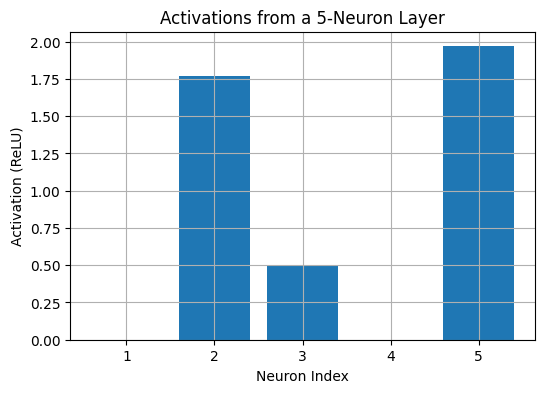

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# input: suppose 3 features
x = np.array([0.6, 0.9, 0.1])

# Single Neuron (random weights + bias)
w = np.random.randn(3)
b = np.random.randn()

# Forward Pass through single neuron
z = np.dot(w, x) + b
output = relu(z)
print("Single Neuron Output (ReLU):", output)

# A layer with 5 neurons
# Simulate a layer with 5 neurons
W = np.random.randn(5, 3)  # 5 neurons, each with 3 input weights
b = np.random.randn(5)     # 5 biases (one per neuron)

# Forward Pass
z = np.dot(W, x) + b
layer_output = relu(z)
print("Layer Output (ReLU):", layer_output)

# Plot the output values of the neurons in the layer
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), layer_output)
plt.xlabel('Neuron Index')
plt.ylabel('Activation (ReLU)')
plt.title('Activations from a 5-Neuron Layer')
plt.grid(True)
plt.show()

## Extended to 2-layer Feedforward Neural Network

In [ ]:
# -------------------------------
# Layer 1: 5 neurons (ReLU)
# -------------------------------
W1 = np.random.randn(5, 3)   # shape: (neurons, input_dim)
b1 = np.random.randn(5)      # one bias per neuron

z1 = np.dot(W1, x) + b1
a1 = relu(z1)  # activation output from layer 1

# -------------------------------
# Layer 2: 2 neurons (Sigmoid)
# -------------------------------
W2 = np.random.randn(2, 5)   # shape: (neurons, previous_layer_dim)
b2 = np.random.randn(2)

z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)  # final output

# Print outputs
print("Layer 1 Output (ReLU):", a1)
print("Layer 2 Output (Sigmoid):", a2)

Layer 1 Output (ReLU): [0.52763855 0.33515013 0.         0.         0.77305119]
Layer 2 Output (Sigmoid): [0.37358924 0.22343856]


# **Why Use Different Numbers of Neurons per Layer?**

1. Dimensionality reduction and abstraction
- As you go deeper into the network, the model abstracts features — from low-level (e.g. edges) to high-level (e.g. faces).
- Fewer neurons in deeper layers can force the model to compress knowledge, encouraging generalization.
  - e.x: Image input (784 neurons) → Hidden layer (256) → Hidden (128) → Output (10 classes)

2. Feature Specialization
- Wide early layers let the network capture many low-level patterns.
- Later layers become more specialized and often need fewer neurons to combine features effectively.

3. Regularization by Design
- Using fewer neurons in deeper layers helps prevent overfitting by limiting model capacity.
- It also reduces computational cost.

## Common Heuristics

1. Pyramid rule:
Use fewer neurons as you go deeper:
Input → 512 → 256 → 128 → 64 → Output

2. Empirical testing:
Try multiple setups and compare via validation accuracy and loss.

3. Power-of-2 rule:
Try neuron counts like 32, 64, 128, 256… These work well with hardware and are common starting points.

4. Avoid over-parameterization:
Don't use more neurons than necessary — you’ll overfit and waste compute.

## **Dont' Forget These:**
- **Activation functions** and **normalization** also affect performance (not just neuron count).

- **Depth vs width tradeoff:** More neurons can sometimes replace deeper layers, but deeper nets often generalize better.

- **Hyperparameter tuning** (with cross-validation) is essential to find the best configuration.

# Calculate total number of Weights in the Neural Network

## Given:
- Input dimension: 10
- 1st hidden layer: 20 neurons
- 2nd hidden layer: 30 neurons
- 3rd hidden layer: 40 neurons
- Output layer: 1 neuron

## Weight Calculatin(including biases)
1. Input → Layer 1 (10 inputs → 20 neurons):
- Each neuron has 10 weights + 1 bias → 11 parameters
- Total: (10+1)×20=220 weights

2. Layer 1 → Layer 2 (20 inputs → 30 neurons):
- Each neuron has 20 weights + 1 bias → 21 parameters
- Total: (20+1)×30=630 weights

3. Layer 2 → Layer 3 (30 inputs → 40 neurons):
- Each neuron has 30 weights + 1 bias → 31 parameters
- Total: (30+1)×40=1240 weights

4. Layer 3 → Output (40 inputs → 1 neuron):
- 1 neuron has 40 weights + 1 bias → 41 parameters
- Total: 40+1=41 weights

==> **Total number of weights:**
  220+630+1240+41= 2131 total weights
​


# **Activation Functions**
An **activation function** introduces non-linearity into the output of a neuron. Without activation functions, a neural network would be equivalent to a linear model, no matter how many layers it has. Non-linear activation functions allow deep networks to learn complex patterns and representations.

## Why is it important?
- Helps the network learn non-linear mappings from inputs to outputs.
- Enables gradient-based optimization (e.g., backpropagation).
- Allows stacking multiple layers effectively (i.e., depth becomes meaningful).

# **Why No activation = Linear Model**
Without activation functions, each layer in a neural network only applies a **linear transformation**:
$$y=W⋅x+b$$
If you stack multiple such linear layers **without** non-linearity, the result is still a single linear transformation — because the **composition of linear functions is still linear.**

##Mathematically:
Suppose you have two layers:
- First layer:
$$h=W_1 x + b$$
- Second layer:
$$
y = W_2 h + b_2 = W_2(W_1 x + b_1) + b_2 = (W_2 W_1)x + (W_2 b_1 + b_2)
$$

This is **just another linear transformation** of input $x$.

###Simple Numerical Example
Let's take a small neural network with:
- Input $x = [1, 2]$
- First layer: weights $W_1 = \begin{bmatrix} 1 & 2 \\ 3 & 4\\ \end{bmatrix}$, bias $b_1 = [1, 1]$
- Second layer: weights $W_2 = [1 1]$, bias $b_2 = 0$

Step 1: First layer (linear)
$$
h = W_1 x + b_1 = \begin{bmatrix} 1 & 2 \\ 3 & 4\\ \end{bmatrix} \begin{bmatrix} 1  \\ 2\\ \end{bmatrix} + \begin{bmatrix} 1 \\ 1\end{bmatrix} = \begin{bmatrix} 1 + 4 + 1 \\ 3 + 8 + 1\end{bmatrix} = \begin{bmatrix} 6 \\ 12\end{bmatrix}
$$

Step 2: Second layer (linear)
$$
y = W_2 h + b_2 = \begin{bmatrix} 1 & 1\end{bmatrix}\begin{bmatrix} 6 \\ 12\end{bmatrix} = 6 + 12 = 18
$$

This is just a linear transformation of the original input. No matter how many such layers you add, it won’t model non-linear patterns unless you insert an activation function between layers.

## Why this is a problem
A linear model can only learn **linear relationships**. That means:
- It cannot capture complex patterns.
- It cannot separate classes that are not linearly separable.

In contrast, non-linear activation functions like ReLU or Sigmoid **break this linearity**, allowing the network to learn powerful non-linear mappings.

# **Common Activation Functions**
| Activation                            | Formula                                                       | Properties                         | Use Case                                    |
|---------------------------------------|----------------------------------------------------------------|------------------------------------|---------------------------------------------|
| **ReLU** (Rectified Linear Unit)      | $f(x) = \max(0, x)$                                            | Fast, sparsity, avoids saturation  | Default for hidden layers                   |
| **Sigmoid**                           | $f(x) = \frac{1}{1 + e^{-x}}$                                  | Smooth, outputs [0, 1]             | Output layer for binary classification      |
| **Tanh**                              | $f(x) = \tanh(x)$                                              | Outputs [-1, 1], zero-centered     | Rare today, sometimes in RNNs               |
| **Leaky ReLU**                        | $f(x) = \max(\alpha x, x)$, $\alpha \approx 0.01$              | Solves ReLU dying neuron problem   | Hidden layers when ReLU fails               |
| **ELU** (Exponential Linear Unit)     | Smooth version of ReLU                                         | Improved convergence in some cases | Deep networks                               |
| **Softmax**                           | $f_i(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}$                      | Outputs probability distribution   | Output layer for multi-class classification |
| **Swish** (by Google)                 | $f(x) = x \cdot \text{sigmoid}(x)$                             | Self-gated, smooth                 | In some modern models like EfficientNet     |
| **GELU** (Gaussian Error Linear Unit) | Approx: $f(x) = 0.5x(1 + \tanh(\sqrt{2/\pi}(x + 0.0447x^3)))$  | Used in transformers               | BERT, GPT, etc.                             |


# How to pick a suitable activation function
| Situation                          | Recommended Function                                              |
| ---------------------------------- | ----------------------------------------------------------------- |
| Hidden layers in most networks     | **ReLU** (or Leaky ReLU if dying ReLU issue)                      |
| Binary classification output       | **Sigmoid**                                                       |
| Multi-class classification output  | **Softmax**                                                       |
| RNNs / time series models          | Historically **Tanh** or **Sigmoid**, now often **ReLU** variants |
| Transformer-based models           | **GELU**                                                          |
| When experimenting for performance | Try **Swish** or **ELU**                                          |


# **Tips**
- Always use **non-linear activation** between layers.
- Avoid **Sigmoid** in deep hidden layers due to vanishing gradients.
- Choose based on **task, layer position, and architecture type**.

# **Fully Connected Layer (Dense Layer)**
A fully connected layer (also called a dense layer) is a layer where every neuron is connected to every neuron in the previous layer.

## **Key Characteristics:**
- Each connection has a **weight** and a **bias**.
- It performs a **linear transformation**, followed by an **activation function**.

## Mathematically:
$$
z = W \cdot x + b \\
a = f(z)
$$

## Purpose
- Used in hidden layers to learn complex features and patterns from data.
- Often appears after convolution or pooling layers in CNNs.

# **Output Layer**
The output layer is the **final layer** in a neural network. It generates the **final prediction** or result of the model.

## Characteristic
- Still fully connected in most cases.
- Activation function is task-specific:
  - **Classification (binary)** → Sigmoid
  - **Classification (multi-class)** → Softmax
  - Regression → Linear (or none)

#Fully Connected Layer vs. Output layer
| Feature     | Fully Connected Layer                | Output Layer                       |
| ----------- | ------------------------------------ | ---------------------------------- |
| Position    | Hidden layers (usually middle)       | Final layer                        |
| Connections | Every input connects to every output | Same (fully connected)             |
| Activation  | ReLU, Tanh, etc.                     | Depends on task (Sigmoid, Softmax) |
| Purpose     | Learn features                       | Generate final prediction          |


# **Loss Function**
A loss function (also called an objective function or cost function) computes a numerical value (loss) that quantifies the difference between the predicted output and the true label.

$$ Loss = Loss(y_{true}, y_{pred})$$

- Lower loss = better predictions
- Higher loss = worse predictions

In deep learning, the loss function is a critical component that **measures how well a model's predictions match the actual target values.** It tells the network how wrong it is, and guides the training process to improve performance.

## Role of Loss function in deep learning
1. Guides learning
  - It acts as a signal to adjust the model’s weights using backpropagation and gradient descent.
  - Without a loss function, the model has no objective to optimize.
2. Enables optimization
  - Gradients (partial derivatives of the loss with respect to model weights) are calculated and used to update weights.
  - The goal is to minimize the loss over the training data.
3. Evaluates performance(during training)
  - Used in training and validation phases to monitor model improvement.
  - Helps detect underfitting or overfitting.


## **Common Loss Functions**
| Problem Type                   | Loss Function                        | Formula / Description                                    |                                     |   |
| ------------------------------ | ------------------------------------ | -------------------------------------------------------- | ----------------------------------- | - |
| **Regression**                 | **Mean Squared Error (MSE)**         | $\frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2$ |                                     |   |
|                                | **Mean Absolute Error (MAE)**        | $\frac{1}{n} \sum |y\_{\text{true}} - y\_{\text{pred}} |$ |
| **Binary Classification**      | **Binary Cross-Entropy**             | $-[y \log(p) + (1 - y)\log(1 - p)]$                      |                                     |   |
| **Multi-Class Classification** | **Categorical Cross-Entropy**        | $-\sum y_i \log(p_i)$                                    |                                     |   |
| **Multi-Label**                | **Binary Cross-Entropy (per label)** | Used when multiple labels apply                          |                                     |   |


## Example: Binary Classification
Suppose:

- True label $y = 1$
- Model prediction $\hat y = 0.9$

Then Binary corss-entropy loss is:
$$
Loss = -[1 ⋅ log(0.9) + 0 ⋅ log(1 - 0.9] = 0.105
$$
If prediction was worse $\hat y = 0.1$, the loss is:
$$
Loss = -log(0.1) = 2.30 (much worse)
$$


# **Cross-Entropy**
Cross-entropy tells us how well the predicted probability distribution matches the actual labels. If the prediction is perfect, cross-entropy is low; if it's wrong, cross-entropy is high.

## Mathematical definition
### For binary classification:
$$
Loss = -[y ⋅ \log(\hat y) + (1 - y)\log(1 - \hat y)]
$$
where:
- $ y \in {0, 1}$: true label
- $ \hat y \in {0, 1}$: predicted probability

### For multi-class classification(Softmax)
If there are **C classes** and the true label vector is one-hot encoded:
$$
Loss = - \sum_{i=1}^{C} y_{i} ⋅ \log(\hat y_{i})
$$
Where:
- $y_i = 1$ if class $i$ is correct, else 0
- $\hat y_i = $ predicted probability for class $i$
since only one class is correct, only one term contributes to the loss.

## Why use cross-entropy?
- It is mathematically grounded in information theory.
- Encourages the model to assign higher probabilities to the correct class.
- Differentiable → suitable for gradient-based optimization.

## **When to use**
| Task                                      | Use This                         |
| ----------------------------------------- | -------------------------------- |
| Binary classification                     | Binary cross-entropy             |
| Multi-class classification (single label) | Categorical cross-entropy        |
| Multi-label classification                | Binary cross-entropy (per label) |



# **Entropy in Informatin Theory**
In information theory, entropy is a measure of uncertainty, surprise, or information content in a random variable. It was introduced by Claude Shannon in 1948 and is fundamental to fields like data compression, communication, cryptography, and machine learning.

## What is Entropy?
Entropy quantifies how unpredictable or informative a probability distribution is.

### Mathematically:
If $X$ is a discrete random variable with possible outcomes $x_1, x_2, ..., x_n$ and corresponding probabilities $p(x_1), p(x_2), ..., p(x_n)$, then the **Shannon entropy** is:
$$
H(X) = -\sum_{i=1}^{n}p(x_i)\log_{2}p(x_i)
$$

- Unit: bits (when using base 2 logarithm)
- High entropy → more uncertainty / randomness
- Low entropy → more certainty / predictability


## Intuition with examples:
1. Fair coin toss:
- $p(H) = 0.5$, $p(T) = 0.5$
- $H = -[0.5\log_{2}(0.5) + 0.5\log_{2}(0.5)] = -[-0.5 - 0.5] = 1$
- perfect uncertainty -> entropy is maximal

2. Biased Coin Toss:
- $p(H) = 0.99$, $p(T) = 0.01$
- $H ≈ 0.08$ bits -> low entropy (almost always heads)




# **Backpropagation**

Backpropagation is the **mechanism for computing gradients** of the loss with respect to each weight in the network, using the chain rule of calculus. These gradients are then used by an **optimizer** (like SGD or Adam) to update the weights.

Backpropagation (short for backward propagation of errors) is the fundamental algorithm used to train deep neural networks by adjusting weights to minimize the loss function. **It’s how a neural network learns from labeled data.**

## High level steps:
1. **Forward pass:** Compute outputs layer by layer and calculate the loss.
2. **Backward pass:** Use the chain rule to compute gradients of the loss w.r.t. each parameter.
3. **Weight update:** Adjust parameters using gradient descent (or a variant).

# Simple Intuitve Example for Backpropagation
## Init setup
- Input: 2 values
- Hidden Layer 1: 2 neurons
- Hidden Layer 2: 2 neurons
- ReLU activation for both hidden layers
- Sigmoid activation for the output layer
- Binary cross-entropy loss

### Inputs:
- $x_1 = 1.0$, $x_2 = 2.0$
- Ground-truth label: $y = 1.0$

### Weights and biases:
Layer 1:
  - w11 = 0.1, w12 = 0.2, b1 = 0.0 (for neuron h11)
  - w13 = 0.3, w14 = 0.4, b2 = 0.0 (for neuron h12)

Layer 2:
  - w21 = 0.5, w22 = 0.6, b3 = 0.0 (for neuron h21)
  - w23 = 0.7, w24 = 0.8, b4 = 0.0 (for neuron h22)

Output layer:
  - w31 = 0.9, w32 = 1.0, b5 = 0.0


## Step 1: **Forward pass**

**Layer 1 (hidden)**:
<pre>
z11 = w11*x1 + w12*x2 + b1 = 0.1*1 + 0.2*2 = 0.5
a11 = ReLU(z11) = 0.5

z12 = w13*x1 + w14*x2 + b2 = 0.3*1 + 0.4*2 = 1.1
a12 = ReLU(z12) = 1.1
</pre>

**Layer 2 (hidden)**
Input = [0.5, 1.1], the output from layer1

<pre>
z21 = w21*a11 + w22*a12 + b3 = 0.5*0.5 + 0.6*1.1 = 0.25 + 0.66 = 0.91
a21 = ReLU(z21) = 0.91

z22 = w23*a11 + w24*a12 + b4 = 0.7*0.5 + 0.8*1.1 = 0.35 + 0.88 = 1.23
a22 = ReLU(z22) = 1.23
</pre>

**Output Layer:**
Input = [0.91, 1.23], the output from layer2

<pre>
z3 = w31*a21 + w32*a22 + b5 = 0.9*0.91 + 1.0*1.23 = 0.819 + 1.23 = 2.049
ŷ = sigmoid(z3) = 1 / (1 + exp(-2.049)) ≈ 0.8858
</pre>

## Step 2: **Compute Loss** (Binary Cross Entropy)
$$
L = -[y \cdot \log(\hat y) + (1 - y) \cdot \log(1 - \hat y)] \\
L = -[log(0.8858)] ≈ 0.121
$$

## Step 3: **Backward Pass**

**Output Layer**
**Gradient of loss w.r.t output:**

Since
$L = -[y \cdot \log(\hat y) + (1 - y) \cdot \log(1 - \hat y)]$ \\
and
$y = 1$ in this case, so
$$
\frac{\partial{L}}{∂{\hat y}} = -[\frac{y}{\hat y} - \frac{1 - y}{1 - \hat y}]
$$

**Derivative of sigmoid:**
Since $\sigma(x) = \frac{1}{1 + exp(-x)}$, and
\begin{aligned}
\frac{d}{dx}\sigma(x) &= \frac{d}{dx}[\frac{1}{1 + exp(-x)}] \\
&= \frac{d}{dx}(1 + e^{-x})^{-1} \\
&= -(1+e^{-x})^{-2}(-e^{-x}) \\
&= \frac{e_{-x}}{(1 + e^{-x})^2} \\
&= \frac{1}{1 + e^{-x}} \cdot \frac{e^{-x}}{1 + e^{-x}} \\
&= \frac{1}{1 + e^{-x}} \cdot (1 - \frac{1}{1 + e^{-x}}) \\
&= σ(x) \cdot (1 - σ(x)) \\
\end{aligned}

Thus:
$$
\frac{\partial\hat y}{∂z3} = \hat y (1 - \hat y)
$$

**Chain rule:**
$$
\frac{\partial L}{∂z3} = \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} = -[\frac{y}{\hat y} - \frac{1 - y}{1 - \hat y}] \cdot \hat y (1 - \hat y) = \hat y - y = 0.8858 - 1 = -0.1142
$$
**Special cases**: if you are using sigmoid activation + BCE loss, then
$\frac{\partial L}{∂z} = \hat y - y$, this is a well-known simplification in deep learning.

**Gradients for weights in output layer:**
$$
\frac{∂L}{∂w31} = \frac{∂L}{∂z3} \cdot a21 ≈ -0.1142 \cdot \mathbf{0.91} ≈ -0.1039 \\
\frac{∂L}{∂w32} = \frac{∂L}{∂z3} \cdot a22 = -0.1142 \cdot \mathbf{1.23} ≈ -0.1405
$$

**Hiden Layer 2**
$$
\frac{∂L}{∂a21} = \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a21} = -0.1142 ⋅ w31 = -0.1142 \cdot 0.9 =  -0.1028
$$
ReLU's at z21 = 1 -> 1, so:
$$
\frac{∂L}{∂z21} = -0.1028 \\
\frac{∂L}{∂w21} = \frac{∂L}{∂z21} \cdot a11 = -0.1028 \cdot \mathbf{0.5} = -0.0514 \\
\frac{∂L}{∂w22} = \frac{∂L}{∂z21} \cdot a12  = -0.1028 \cdot \mathbf{1.1} = -0.1131
$$

\\

$$
\frac{∂L}{∂a22} = \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a22} = -0.1142 ⋅ w32 = -0.1142 \cdot 1.0 =  -0.1142
$$
ReLU's at z22 = 1 -> 1, so:
$$
\frac{∂L}{∂z22} = -0.1142 \\
\frac{∂L}{∂w23} = \frac{∂L}{∂z22} \cdot a11 = -0.142 \cdot \mathbf{0.5} = -0.0571 \\
\frac{∂L}{∂w24} = \frac{∂L}{∂z22} \cdot a12  = -0.142 \cdot \mathbf{1.1} = -0.1256
$$

**Hiden Layer 1**

Follow the same chain rule:
\begin{aligned}
\frac{∂L}{∂a11} &= \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a21} + \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a22} \\
&= \frac{∂L}{∂z21} \cdot w21 + \frac{∂L}{∂z22} \cdot w23 \\
&=-0.1028 ⋅ 0.5 + (-0.1142) \cdot 0.7 \\
&=-0.1313 \\
\end{aligned}

\begin{aligned}
\frac{∂L}{∂a12} &= \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a21} + \frac{∂L}{∂\hat y} \cdot \frac{∂\hat y}{∂z3} \cdot \frac{∂z3}{∂a22} \\
&= \frac{∂L}{∂z21} \cdot w22 + \frac{∂L}{∂z22} \cdot w24 \\
&=-0.1028 \cdot 0.6 + (-0.1142) \cdot 0.8 \\
&=-0.1531
\end{aligned}

Then:
$$
\frac{∂L}{∂w11} = \frac{∂L}{∂a11} \cdot ReLU'(z11)
$$
ReLU's at z11 = 0.5 -> 1, so:
$$
\frac{∂L}{∂w11} = \frac{∂L}{∂z11} \cdot x1 = \frac{∂L}{∂a11} \cdot x1 = -0.1313 \cdot 1 = -0.1313\\
\frac{∂L}{∂w12} = \frac{∂L}{∂z11} \cdot x2 = \frac{∂L}{∂a11} \cdot x2 = -0.1313 \cdot 2 = -0.2626\\
\frac{∂L}{∂w13} = \frac{∂L}{∂z12} \cdot x1 = \frac{∂L}{∂a12} \cdot x1 =-0.1531 \cdot 1 = -0.1531\\
\frac{∂L}{∂w14} = \frac{∂L}{∂z12} \cdot x2 = \frac{∂L}{∂a12} \cdot x2 =-0.1531 \cdot 2 = -0.3062\\
$$

# **Weight Updates**
With learning rate $\eta = 0.1$:

$w^{new} = w_{old} - \eta * \frac{∂L}{∂w_{old}}$

# Code Implementation

In [13]:
import numpy as np

# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    # Ensure input is a NumPy array for consistent behavior
    x = np.array(x)
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Define Binary Cross-Entrop Loss and its Derivative
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10 # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    # Derivative of BCE with respect to y_pred
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

In [14]:
# Neural Network Setup
# Inputs
x1 = 1.0
x2 = 2.0
X = np.array([x1, x2])

# Ground-truth label
y_true = 1.0

# Weights and biases
# Layer 1
w11, w12, b1 = 0.1, 0.2, 0.0  # Neuron h11
w13, w14, b2 = 0.3, 0.4, 0.0  # Neuron h12

# Layer 2
w21, w22, b3 = 0.5, 0.6, 0.0  # Neuron h21
w23, w24, b4 = 0.7, 0.8, 0.0  # Neuron h22

# Output layer
w31, w32, b5 = 0.9, 1.0, 0.0

# Learning rate
learning_rate = 0.1 # A common choice, adjust as needed

print("--- Initial Weights and Biases ---")
print(f"Layer 1: w11={w11}, w12={w12}, b1={b1}")
print(f"         w13={w13}, w14={w14}, b2={b2}")
print(f"Layer 2: w21={w21}, w22={w22}, b3={b3}")
print(f"         w23={w23}, w24={w24}, b4={b4}")
print(f"Output Layer: w31={w31}, w32={w32}, b5={b5}")
print(f"Learning Rate: {learning_rate}\n")

--- Initial Weights and Biases ---
Layer 1: w11=0.1, w12=0.2, b1=0.0
         w13=0.3, w14=0.4, b2=0.0
Layer 2: w21=0.5, w22=0.6, b3=0.0
         w23=0.7, w24=0.8, b4=0.0
Output Layer: w31=0.9, w32=1.0, b5=0.0
Learning Rate: 0.1



# **Forward Pass**

In [15]:
print("--- Forward Pass ---")

# Layer 1 Calculations
# Neuron h11
z11 = w11 * x1 + w12 * x2 + b1
h11 = relu(z11)
print(f"z11 (w11*x1 + w12*x2 + b1): {w11}*{x1} + {w12}*{x2} + {b1} = {z11}")
print(f"h11 (ReLU(z11)): {h11}")

# Neuron h12
z12 = w13 * x1 + w14 * x2 + b2
h12 = relu(z12)
print(f"z12 (w13*x1 + w14*x2 + b2): {w13}*{x1} + {w14}*{x2} + {b2} = {z12}")
print(f"h12 (ReLU(z12)): {h12}\n")

# Store outputs of Layer 1 for Layer 2 inputs
H1 = np.array([h11, h12])

# Layer 2 Calculations
# Neuron h21
z21 = w21 * h11 + w22 * h12 + b3
h21 = relu(z21)
print(f"z21 (w21*h11 + w22*h12 + b3): {w21}*{h11} + {w22}*{h12} + {b3} = {z21}")
print(f"h21 (ReLU(z21)): {h21}")

# Neuron h22
z22 = w23 * h11 + w24 * h12 + b4
h22 = relu(z22)
print(f"z22 (w23*h11 + w24*h12 + b4): {w23}*{h11} + {w24}*{h12} + {b4} = {z22}")
print(f"h22 (ReLU(z22)): {h22}\n")

# Store outputs of Layer 2 for Output Layer inputs
H2 = np.array([h21, h22])

# Output Layer Calculation
z_out = w31 * h21 + w32 * h22 + b5
y_pred = sigmoid(z_out)
print(f"z_out (w31*h21 + w32*h22 + b5): {w31}*{h21} + {w32}*{h22} + {b5} = {z_out}")
print(f"y_pred (Sigmoid(z_out)): {y_pred}\n")

# Calculate Initial Loss
loss = binary_cross_entropy(y_true, y_pred)
print(f"Ground Truth (y_true): {y_true}")
print(f"Predicted Output (y_pred): {y_pred}")
print(f"Initial Loss (Binary Cross-Entropy): {loss}\n")

--- Forward Pass ---
z11 (w11*x1 + w12*x2 + b1): 0.1*1.0 + 0.2*2.0 + 0.0 = 0.5
h11 (ReLU(z11)): 0.5
z12 (w13*x1 + w14*x2 + b2): 0.3*1.0 + 0.4*2.0 + 0.0 = 1.1
h12 (ReLU(z12)): 1.1

z21 (w21*h11 + w22*h12 + b3): 0.5*0.5 + 0.6*1.1 + 0.0 = 0.91
h21 (ReLU(z21)): 0.91
z22 (w23*h11 + w24*h12 + b4): 0.7*0.5 + 0.8*1.1 + 0.0 = 1.23
h22 (ReLU(z22)): 1.23

z_out (w31*h21 + w32*h22 + b5): 0.9*0.91 + 1.0*1.23 + 0.0 = 2.049
y_pred (Sigmoid(z_out)): 0.8858465352801156

Ground Truth (y_true): 1.0
Predicted Output (y_pred): 0.8858465352801156
Initial Loss (Binary Cross-Entropy): 0.12121155412456014



# **Backpropagation**

In [16]:
# dL/dy_pred
dL_dy_pred = binary_cross_entropy_derivative(y_true, y_pred)
print(f"dL/dy_pred (derivative of BCE wrt y_pred): {dL_dy_pred}")

# dy_pred/dz_out
dy_pred_dz_out = sigmoid_derivative(z_out)
print(f"dy_pred/dz_out (derivative of Sigmoid wrt z_out): {dy_pred_dz_out}")

# dL/dz_out (Chain rule: dL/dy_pred * dy_pred/dz_out)
dL_dz_out = dL_dy_pred * dy_pred_dz_out
print(f"dL/dz_out (dL/dy_pred * dy_pred/dz_out): {dL_dz_out}\n")

dL/dy_pred (derivative of BCE wrt y_pred): -1.128863702880305
dy_pred/dz_out (derivative of Sigmoid wrt z_out): 0.10112245121233052
dL/dz_out (dL/dy_pred * dy_pred/dz_out): -0.11415346471988441



#**Gradients for weights and bias of the Output Layer**

In [17]:
# dL/dw31 = dL/dz_out * dz_out/dw31 = dL/dz_out * h21
dL_dw31 = dL_dz_out * h21
print(f"dL/dw31 (dL/dz_out * h21): {dL_dw31}")

# dL/dw32 = dL/dz_out * dz_out/dw32 = dL/dz_out * h22
dL_dw32 = dL_dz_out * h22
print(f"dL/dw32 (dL/dz_out * h22): {dL_dw32}")

# dL/db5 = dL/dz_out * dz_out/db5 = dL/dz_out * 1
dL_db5 = dL_dz_out * 1
print(f"dL/db5 (dL/dz_out * 1): {dL_db5}\n")

dL/dw31 (dL/dz_out * h21): -0.10387965289509482
dL/dw32 (dL/dz_out * h22): -0.14040876160545782
dL/db5 (dL/dz_out * 1): -0.11415346471988441



#**Gradients for Hidden Layer 2**

In [18]:
# We need to propagate error back from the output layer to hidden layer 2.
# The error signal that neuron h21 receives is dL/dh21.
# The error signal that neuron h22 receives is dL/dh22.

# dL/dh21 = dL/dz_out * dz_out/dh21 = dL/dz_out * w31
dL_dh21 = dL_dz_out * w31
print(f"dL/dh21 (dL/dz_out * w31): {dL_dh21}")

# dL/dh22 = dL/dz_out * dz_out/dh22 = dL/dz_out * w32
dL_dh22 = dL_dz_out * w32
print(f"dL/dh22 (dL/dz_out * w32): {dL_dh22}\n")

# dL/dz21 = dL/dh21 * dh21/dz21 = dL/dh21 * ReLU_derivative(z21)
dL_dz21 = dL_dh21 * relu_derivative(z21)
print(f"dL/dz21 (dL/dh21 * ReLU_derivative(z21)): {dL_dz21}")

# dL/dz22 = dL/dh22 * dh22/dz22 = dL/dh22 * ReLU_derivative(z22)
dL_dz22 = dL_dh22 * relu_derivative(z22)
print(f"dL/dz22 (dL/dh22 * ReLU_derivative(z22)): {dL_dz22}\n")

# Gradients for weights and biases of Hidden Layer 2
# dL/dw21 = dL/dz21 * dz21/dw21 = dL/dz21 * h11
dL_dw21 = dL_dz21 * h11
print(f"dL/dw21 (dL/dz21 * h11): {dL_dw21}")

# dL/dw22 = dL/dz21 * dz21/dw22 = dL/dz21 * h12
dL_dw22 = dL_dz21 * h12
print(f"dL/dw22 (dL/dz21 * h12): {dL_dw22}")

# dL/db3 = dL/dz21 * dz21/db3 = dL/dz21 * 1
dL_db3 = dL_dz21 * 1
print(f"dL/db3 (dL/dz21 * 1): {dL_db3}\n")

# dL/dw23 = dL/dz22 * dz22/dw23 = dL/dz22 * h11
dL_dw23 = dL_dz22 * h11
print(f"dL/dw23 (dL/dz22 * h11): {dL_dw23}")

# dL/dw24 = dL/dz22 * dz22/dw24 = dL/dz22 * h12
dL_dw24 = dL_dz22 * h12
print(f"dL/dw24 (dL/dz22 * h12): {dL_dw24}")

# dL/db4 = dL/dz22 * dz22/db4 = dL/dz22 * 1
dL_db4 = dL_dz22 * 1
print(f"dL/db4 (dL/dz22 * 1): {dL_db4}\n")

dL/dh21 (dL/dz_out * w31): -0.10273811824789597
dL/dh22 (dL/dz_out * w32): -0.11415346471988441

dL/dz21 (dL/dh21 * ReLU_derivative(z21)): -0.10273811824789597
dL/dz22 (dL/dh22 * ReLU_derivative(z22)): -0.11415346471988441

dL/dw21 (dL/dz21 * h11): -0.051369059123947985
dL/dw22 (dL/dz21 * h12): -0.11301193007268558
dL/db3 (dL/dz21 * 1): -0.10273811824789597

dL/dw23 (dL/dz22 * h11): -0.057076732359942206
dL/dw24 (dL/dz22 * h12): -0.12556881119187285
dL/db4 (dL/dz22 * 1): -0.11415346471988441



#**Gradients for Hidden Layer 1**

In [19]:
# A hidden neuron in Layer 1 (e.g., h11) contributes to both h21 and h22.
# So, dL/dh11 = (dL/dz21 * dz21/dh11) + (dL/dz22 * dz22/dh11)
# dL/dh11 = (dL/dz21 * w21) + (dL/dz22 * w23)
dL_dh11 = (dL_dz21 * w21) + (dL_dz22 * w23)
print(f"dL/dh11 (sum of dL/dz21*w21 and dL/dz22*w23): {dL_dh11}")

# dL/dh12 = (dL/dz21 * dz21/dh12) + (dL/dz22 * dz22/dh12)
# dL/dh12 = (dL/dz21 * w22) + (dL/dz22 * w24)
dL_dh12 = (dL_dz21 * w22) + (dL_dz22 * w24)
print(f"dL/dh12 (sum of dL/dz21*w22 and dL/dz22*w24): {dL_dh12}\n")

# Now, we need dL/dz11 and dL/dz12
# dL/dz11 = dL/dh11 * dh11/dz11 = dL/dh11 * ReLU_derivative(z11)
# Pass z11 as a NumPy array
dL_dz11 = dL_dh11 * relu_derivative(np.array(z11))
print(f"dL/dz11 (dL/dh11 * ReLU_derivative(z11)): {dL_dz11}")

# dL/dz12 = dL/dh12 * dh12/dz12 = dL/dh12 * ReLU_derivative(z12)
# Pass z12 as a NumPy array
dL_dz12 = dL_dh12 * relu_derivative(np.array(z12))
print(f"dL/dz12 (dL/dh12 * ReLU_derivative(z12)): {dL_dz12}\n")


# Gradients for weights and biases of Hidden Layer 1
# dL/dw11 = dL/dz11 * dz11/dw11 = dL/dz11 * x1
dL_dw11 = dL_dz11 * x1
print(f"dL/dw11 (dL/dz11 * x1): {dL_dw11}")

# dL/dw12 = dL/dz11 * dz11/dw12 = dL/dz11 * x2
dL_dw12 = dL_dz11 * x2
print(f"dL/dw12 (dL/dz11 * x2): {dL_dw12}")

# dL/db1 = dL/dz11 * dz11/db1 = dL/dz11 * 1
dL_db1 = dL_dz11 * 1
print(f"dL/db1 (dL/dz11 * 1): {dL_db1}\n")

# dL/dw13 = dL/dz12 * dz12/dw13 = dL/dz12 * x1
dL_dw13 = dL_dz12 * x1
print(f"dL/dw13 (dL/dz12 * x1): {dL_dw13}")

# dL/dw14 = dL/dz12 * dz12/dw14 = dL/dz12 * x2
dL_dw14 = dL_dz12 * x2
print(f"dL/dw14 (dL/dz12 * x2): {dL_dw14}")

# dL/db2 = dL/dz12 * dz12/db2 = dL/dz12 * 1
dL_db2 = dL_dz12 * 1
print(f"dL/db2 (dL/dz12 * 1): {dL_db2}\n")

dL/dh11 (sum of dL/dz21*w21 and dL/dz22*w23): -0.13127648442786707
dL/dh12 (sum of dL/dz21*w22 and dL/dz22*w24): -0.1529656427246451

dL/dz11 (dL/dh11 * ReLU_derivative(z11)): -0.13127648442786707
dL/dz12 (dL/dh12 * ReLU_derivative(z12)): -0.1529656427246451

dL/dw11 (dL/dz11 * x1): -0.13127648442786707
dL/dw12 (dL/dz11 * x2): -0.26255296885573415
dL/db1 (dL/dz11 * 1): -0.13127648442786707

dL/dw13 (dL/dz12 * x1): -0.1529656427246451
dL/dw14 (dL/dz12 * x2): -0.3059312854492902
dL/db2 (dL/dz12 * 1): -0.1529656427246451



#**Weight Updates**

Weight Updates = Current Weights - Learning Rate * Gradient

In [20]:
# Update Output Layer weights and bias
w31_new = w31 - learning_rate * dL_dw31
w32_new = w32 - learning_rate * dL_dw32
b5_new = b5 - learning_rate * dL_db5
print(f"New w31: {w31} - {learning_rate} * {dL_dw31} = {w31_new}")
print(f"New w32: {w32} - {learning_rate} * {dL_dw32} = {w32_new}")
print(f"New b5: {b5} - {learning_rate} * {dL_db5} = {b5_new}\n")

# Update Layer 2 weights and biases
w21_new = w21 - learning_rate * dL_dw21
w22_new = w22 - learning_rate * dL_dw22
b3_new = b3 - learning_rate * dL_db3
print(f"New w21: {w21} - {learning_rate} * {dL_dw21} = {w21_new}")
print(f"New w22: {w22} - {learning_rate} * {dL_dw22} = {w22_new}")
print(f"New b3: {b3} - {learning_rate} * {dL_db3} = {b3_new}\n")

w23_new = w23 - learning_rate * dL_dw23
w24_new = w24 - learning_rate * dL_dw24
b4_new = b4 - learning_rate * dL_db4
print(f"New w23: {w23} - {learning_rate} * {dL_dw23} = {w23_new}")
print(f"New w24: {w24} - {learning_rate} * {dL_dw24} = {w24_new}")
print(f"New b4: {b4} - {learning_rate} * {dL_db4} = {b4_new}\n")

# Update Layer 1 weights and biases
w11_new = w11 - learning_rate * dL_dw11
w12_new = w12 - learning_rate * dL_dw12
b1_new = b1 - learning_rate * dL_db1
print(f"New w11: {w11} - {learning_rate} * {dL_dw11} = {w11_new}")
print(f"New w12: {w12} - {learning_rate} * {dL_dw12} = {w12_new}")
print(f"New b1: {b1} - {learning_rate} * {dL_db1} = {b1_new}\n")

w13_new = w13 - learning_rate * dL_dw13
w14_new = w14 - learning_rate * dL_dw14
b2_new = b2 - learning_rate * dL_db2
print(f"New w13: {w13} - {learning_rate} * {dL_dw13} = {w13_new}")
print(f"New w14: {w14} - {learning_rate} * {dL_dw14} = {w14_new}")
print(f"New b2: {b2} - {learning_rate} * {dL_db2} = {b2_new}\n")

New w31: 0.9 - 0.1 * -0.10387965289509482 = 0.9103879652895095
New w32: 1.0 - 0.1 * -0.14040876160545782 = 1.0140408761605457
New b5: 0.0 - 0.1 * -0.11415346471988441 = 0.011415346471988441

New w21: 0.5 - 0.1 * -0.051369059123947985 = 0.5051369059123948
New w22: 0.6 - 0.1 * -0.11301193007268558 = 0.6113011930072685
New b3: 0.0 - 0.1 * -0.10273811824789597 = 0.010273811824789598

New w23: 0.7 - 0.1 * -0.057076732359942206 = 0.7057076732359941
New w24: 0.8 - 0.1 * -0.12556881119187285 = 0.8125568811191873
New b4: 0.0 - 0.1 * -0.11415346471988441 = 0.011415346471988441

New w11: 0.1 - 0.1 * -0.13127648442786707 = 0.11312764844278672
New w12: 0.2 - 0.1 * -0.26255296885573415 = 0.22625529688557344
New b1: 0.0 - 0.1 * -0.13127648442786707 = 0.013127648442786709

New w13: 0.3 - 0.1 * -0.1529656427246451 = 0.3152965642724645
New w14: 0.4 - 0.1 * -0.3059312854492902 = 0.43059312854492904
New b2: 0.0 - 0.1 * -0.1529656427246451 = 0.015296564272464511



# **Implement the Sample Neural Network in TensorFlow**

In [2]:
import tensorflow as tf
import numpy as np

# Inputs
x1_val = 1.0
x2_val = 2.0
X = tf.constant([[x1_val, x2_val]], dtype=tf.float32)

# Ground-truth label
y_true = tf.constant([[1.0]], dtype=tf.float32)

# Initial Weights and Biases (as TensorFlow Variables so they can be updated)
# Layer 1
w11 = tf.Variable(0.1, dtype=tf.float32, name='w11')
w12 = tf.Variable(0.2, dtype=tf.float32, name='w12')
b1 = tf.Variable(0.0, dtype=tf.float32, name='b1')

w13 = tf.Variable(0.3, dtype=tf.float32, name='w13')
w14 = tf.Variable(0.4, dtype=tf.float32, name='w14')
b2 = tf.Variable(0.0, dtype=tf.float32, name='b2')

# Layer 2
w21 = tf.Variable(0.5, dtype=tf.float32, name='w21')
w22 = tf.Variable(0.6, dtype=tf.float32, name='w22')
b3 = tf.Variable(0.0, dtype=tf.float32, name='b3')

w23 = tf.Variable(0.7, dtype=tf.float32, name='w23')
w24 = tf.Variable(0.8, dtype=tf.float32, name='w24')
b4 = tf.Variable(0.0, dtype=tf.float32, name='b4')

# Output layer
w31 = tf.Variable(0.9, dtype=tf.float32, name='w31')
w32 = tf.Variable(1.0, dtype=tf.float32, name='w32')
b5 = tf.Variable(0.0, dtype=tf.float32, name='b5')

# Group weights and biases by layer for easier management
layer1_weights = tf.stack([[w11, w13], [w12, w14]]) # Shape (2, 2)
layer1_biases = tf.stack([b1, b2]) # Shape (2,)

layer2_weights = tf.stack([[w21, w23], [w22, w24]]) # Shape (2, 2)
layer2_biases = tf.stack([b3, b4]) # Shape (2,)

output_weights = tf.stack([[w31], [w32]]) # Shape (2, 1)
output_bias = b5 # Scalar

# List of all trainable variables
trainable_variables = [
    w11, w12, b1, w13, w14, b2,
    w21, w22, b3, w23, w24, b4,
    w31, w32, b5
]

learning_rate = 0.1

print("--- Initial Weights and Biases (TensorFlow Variables) ---")
for var in trainable_variables:
    print(f"{var.name}: {var.numpy()}")
print(f"Learning Rate: {learning_rate}\n")

--- Initial Weights and Biases (TensorFlow Variables) ---
w11:0: 0.10000000149011612
w12:0: 0.20000000298023224
b1:0: 0.0
w13:0: 0.30000001192092896
w14:0: 0.4000000059604645
b2:0: 0.0
w21:0: 0.5
w22:0: 0.6000000238418579
b3:0: 0.0
w23:0: 0.699999988079071
w24:0: 0.800000011920929
b4:0: 0.0
w31:0: 0.8999999761581421
w32:0: 1.0
b5:0: 0.0
Learning Rate: 0.1



In [4]:
with tf.GradientTape() as tape:
    # Forward Pass

    # Layer 1
    # x_val is [1.0, 2.0]
    # x_val[0] = 1.0, x_val[1] = 2.0
    # h11 = relu(w11*x1 + w12*x2 + b1)
    # h12 = relu(w13*x1 + w14*x2 + b2)
    z1_h11 = w11 * X[0, 0] + w12 * X[0, 1] + b1
    h11 = tf.nn.relu(z1_h11)

    z1_h12 = w13 * X[0, 0] + w14 * X[0, 1] + b2
    h12 = tf.nn.relu(z1_h12)
    H1 = tf.stack([h11, h12]) # Shape (2,)

    print("--- Forward Pass (TensorFlow) ---")
    print(f"z11 (w11*x1 + w12*x2 + b1): {z1_h11.numpy()}")
    print(f"h11 (ReLU(z11)): {h11.numpy()}")
    print(f"z12 (w13*x1 + w14*x2 + b2): {z1_h12.numpy()}")
    print(f"h12 (ReLU(z12)): {h12.numpy()}\n")

    # Layer 2
    # h21 = relu(w21*h11 + w22*h12 + b3)
    # h22 = relu(w23*h11 + w24*h12 + b4)
    z2_h21 = w21 * H1[0] + w22 * H1[1] + b3
    h21 = tf.nn.relu(z2_h21)

    z2_h22 = w23 * H1[0] + w24 * H1[1] + b4
    h22 = tf.nn.relu(z2_h22)
    H2 = tf.stack([h21, h22]) # Shape (2,)

    print(f"z21 (w21*h11 + w22*h12 + b3): {z2_h21.numpy()}")
    print(f"h21 (ReLU(z21)): {h21.numpy()}")
    print(f"z22 (w23*h11 + w24*h12 + b4): {z2_h22.numpy()}")
    print(f"h22 (ReLU(z22)): {h22.numpy()}\n")

    # Output Layer
    # y_pred = sigmoid(w31*h21 + w32*h22 + b5)
    z_out = w31 * H2[0] + w32 * H2[1] + b5
    y_pred = tf.nn.sigmoid(z_out)

    print(f"z_out (w31*h21 + w32*h22 + b5): {z_out.numpy()}")
    print(f"y_pred (Sigmoid(z_out)): {y_pred.numpy()}\n")

    # Calculate Loss (Binary Cross-Entropy)
    loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    # Reshape y_pred to match y_true's shape
    loss = loss_object(y_true, tf.reshape(y_pred, y_true.shape))

    print(f"Ground Truth (y_true): {y_true.numpy()}")
    print(f"Predicted Output (y_pred): {y_pred.numpy()}")
    print(f"Calculated Loss (Binary Cross-Entropy): {loss.numpy()}\n")

--- Forward Pass (TensorFlow) ---
z11 (w11*x1 + w12*x2 + b1): 0.5
h11 (ReLU(z11)): 0.5
z12 (w13*x1 + w14*x2 + b2): 1.100000023841858
h12 (ReLU(z12)): 1.100000023841858

z21 (w21*h11 + w22*h12 + b3): 0.9100000262260437
h21 (ReLU(z21)): 0.9100000262260437
z22 (w23*h11 + w24*h12 + b4): 1.2300000190734863
h22 (ReLU(z22)): 1.2300000190734863

z_out (w31*h21 + w32*h22 + b5): 2.0490000247955322
y_pred (Sigmoid(z_out)): 0.8858464956283569

Ground Truth (y_true): [[1.]]
Predicted Output (y_pred): 0.8858464956283569
Calculated Loss (Binary Cross-Entropy): 0.12121159583330154



# **Backpropagation**


In [5]:
# Compute gradients of the loss with respect to all trainable variables
gradients = tape.gradient(loss, trainable_variables)

# Print gradients for inspection
for i, var in enumerate(trainable_variables):
    print(f"dL/d{var.name}: {gradients[i].numpy()}")

# Apply gradients to update weights using a simple SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Create a list of (gradient, variable) pairs for the optimizer to apply
grads_and_vars = zip(gradients, trainable_variables)

# Apply the updates (this is where weights actually change)
optimizer.apply_gradients(grads_and_vars)

print("\n--- Updated Weights and Biases ---")
for var in trainable_variables:
    print(f"{var.name} (updated): {var.numpy()}")

dL/dw11:0: -0.13127653300762177
dL/dw12:0: -0.26255306601524353
dL/db1:0: -0.13127653300762177
dL/dw13:0: -0.1529656946659088
dL/dw14:0: -0.3059313893318176
dL/db2:0: -0.1529656946659088
dL/dw21:0: -0.0513690747320652
dL/dw22:0: -0.11301196366548538
dL/db3:0: -0.1027381494641304
dL/dw23:0: -0.05707675218582153
dL/dw24:0: -0.12556885182857513
dL/db4:0: -0.11415350437164307
dL/dw31:0: -0.10387969017028809
dL/dw32:0: -0.14040881395339966
dL/db5:0: -0.11415350437164307

--- Updated Weights and Biases ---
w11:0 (updated): 0.11312765628099442
w12:0 (updated): 0.22625531256198883
b1:0 (updated): 0.013127653859555721
w13:0 (updated): 0.31529659032821655
w14:0 (updated): 0.4305931329727173
b2:0 (updated): 0.015296570025384426
w21:0 (updated): 0.5051369071006775
w22:0 (updated): 0.6113012433052063
b3:0 (updated): 0.010273815132677555
w23:0 (updated): 0.7057076692581177
w24:0 (updated): 0.8125569224357605
b4:0 (updated): 0.011415350250899792
w31:0 (updated): 0.9103879332542419
w32:0 (updated): 1.

# Optimizer in Deep Learning
An optimizer is an algorithm or method used to adjust the weights and biases of a neural network to minimize the loss function during training. It’s the engine behind model learning—determining how much and in what direction the parameters should change after each training step (based on gradients computed via backpropagation).

| Optimizer    | Key Idea                                     | Notes                                           |
| ------------ | -------------------------------------------- | ----------------------------------------------- |
| **SGD**      | Vanilla stochastic gradient descent          | May converge slowly; sensitive to learning rate |
| **Momentum** | Accelerates SGD by adding a velocity term    | Helps escape local minima                       |
| **AdaGrad**  | Adapts learning rate for each parameter      | Good for sparse data, but may shrink too much   |
| **RMSProp**  | Like AdaGrad but avoids shrinking too fast   | Good for RNNs                                   |
| **Adam**     | Combines momentum and adaptive learning rate | Most widely used, generally performs well       |


#**Implement the Sample Neural Network in PyTorch**

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Inputs
x1_val = 1.0
x2_val = 2.0
X = torch.tensor([[x1_val, x2_val]], dtype=torch.float32) # Input needs to be a tensor with batch dimension

# Ground-truth label
y_true = torch.tensor([[1.0]], dtype=torch.float32) # Ground truth also needs to be a tensor

# Learning Rate
learning_rate = 0.1

In [13]:
# Define the Neural Network using nn.Module
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Layer 1 (Hidden Layer 1)
        self.w11 = nn.Parameter(torch.tensor(0.1, dtype=torch.float32), requires_grad=True)
        self.w12 = nn.Parameter(torch.tensor(0.2, dtype=torch.float32), requires_grad=True)
        self.b1 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32), requires_grad=True)

        self.w13 = nn.Parameter(torch.tensor(0.3, dtype=torch.float32), requires_grad=True)
        self.w14 = nn.Parameter(torch.tensor(0.4, dtype=torch.float32), requires_grad=True)
        self.b2 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32), requires_grad=True)

        # Layer 2 (Hidden Layer 2)
        # h21 from (h11, h12)
        self.w21 = nn.Parameter(torch.tensor(0.5, dtype=torch.float32), requires_grad=True)
        self.w22 = nn.Parameter(torch.tensor(0.6, dtype=torch.float32), requires_grad=True)
        self.b3 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32), requires_grad=True)

        # h22 from (h11, h12)
        self.w23 = nn.Parameter(torch.tensor(0.7, dtype=torch.float32), requires_grad=True)
        self.w24 = nn.Parameter(torch.tensor(0.8, dtype=torch.float32), requires_grad=True)
        self.b4 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32), requires_grad=True)

        # Output Layer
        # y_pred from (h21, h22)
        self.w31 = nn.Parameter(torch.tensor(0.9, dtype=torch.float32), requires_grad=True)
        self.w32 = nn.Parameter(torch.tensor(1.0, dtype=torch.float32), requires_grad=True)
        self.b5 = nn.Parameter(torch.tensor(0.0, dtype=torch.float32), requires_grad=True)

    def forward(self, x):
        # Layer 1
        x1 = x[:, 0] # First input feature
        x2 = x[:, 1] # Second input feature

        # Neuron h11
        z11 = self.w11 * x1 + self.w12 * x2 + self.b1
        h11 = torch.relu(z11)

        # Neuron h12
        z12 = self.w13 * x1 + self.w14 * x2 + self.b2
        h12 = torch.relu(z12)

        H1 = torch.stack([h11, h12], dim=1) # Stack to form a 1x2 tensor

        # Layer 2
        # Neuron h21
        z21 = self.w21 * H1[:, 0] + self.w22 * H1[:, 1] + self.b3
        h21 = torch.relu(z21)

        # Neuron h22
        z22 = self.w23 * H1[:, 0] + self.w24 * H1[:, 1] + self.b4
        h22 = torch.relu(z22)

        H2 = torch.stack([h21, h22], dim=1) # Stack to form a 1x2 tensor

        # Output Layer
        z_out = self.w31 * H2[:, 0] + self.w32 * H2[:, 1] + self.b5
        y_pred = torch.sigmoid(z_out)

        return y_pred, {
            'z11': z11, 'h11': h11, 'z12': z12, 'h12': h12,
            'z21': z21, 'h21': h21, 'z22': z22, 'h22': h22,
            'z_out': z_out
        }


In [15]:
model = SimpleNN()

# Print initial weights and biases
for name, param in model.named_parameters():
    print(f"{name}: {param.item()}")
print(f"Learning Rate: {learning_rate}\n")

print("--- Forward Pass (PyTorch) ---")
y_pred, intermediates = model(X)

print(f"z11: {intermediates['z11'].item()}")
print(f"h11 (ReLU(z11)): {intermediates['h11'].item()}")
print(f"z12: {intermediates['z12'].item()}")
print(f"h12 (ReLU(z12)): {intermediates['h12'].item()}\n")

print(f"z21: {intermediates['z21'].item()}")
print(f"h21 (ReLU(z21)): {intermediates['h21'].item()}")
print(f"z22: {intermediates['z22'].item()}")
print(f"h22 (ReLU(z22)): {intermediates['h22'].item()}\n")

print(f"z_out: {intermediates['z_out'].item()}")
print(f"y_pred (Sigmoid(z_out)): {y_pred.item()}\n")

# Calculate loss
loss_function = nn.BCELoss()
# Reshape y_pred to match y_true's shape
loss = loss_function(torch.reshape(y_pred, y_true.shape), y_true)

print(f"Ground Truth (y_true): {y_true.item()}")
print(f"Predicted Output (y_pred): {y_pred.item()}")
print(f"Initial Loss (Binary Cross-Entropy): {loss.item()}\n")

w11: 0.10000000149011612
w12: 0.20000000298023224
b1: 0.0
w13: 0.30000001192092896
w14: 0.4000000059604645
b2: 0.0
w21: 0.5
w22: 0.6000000238418579
b3: 0.0
w23: 0.699999988079071
w24: 0.800000011920929
b4: 0.0
w31: 0.8999999761581421
w32: 1.0
b5: 0.0
Learning Rate: 0.1

--- Forward Pass (PyTorch) ---
z11: 0.5
h11 (ReLU(z11)): 0.5
z12: 1.100000023841858
h12 (ReLU(z12)): 1.100000023841858

z21: 0.9100000262260437
h21 (ReLU(z21)): 0.9100000262260437
z22: 1.2300000190734863
h22 (ReLU(z22)): 1.2300000190734863

z_out: 2.0490000247955322
y_pred (Sigmoid(z_out)): 0.8858465552330017

Ground Truth (y_true): 1.0
Predicted Output (y_pred): 0.8858465552330017
Initial Loss (Binary Cross-Entropy): 0.12121152877807617



In [16]:
# --- Backpropagation ---
print("--- Backpropagation (PyTorch) ---")
# Zero the gradients before computing new ones.
# This is crucial in PyTorch because gradients accumulate by default.
model.zero_grad()

# Compute gradients of the loss with respect to all trainable parameters
loss.backward()

# Print gradients for inspection
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"dL/d{name}: {param.grad.item()}")
    else:
        print(f"dL/d{name}: None (no gradient calculated for this parameter)")

print("\n--- Weight Updates (PyTorch Optimizer) ---")
# Initialize an optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Perform a single optimization step (updates weights based on gradients)
optimizer.step()

print("\n--- Updated Weights and Biases ---")
for name, param in model.named_parameters():
    print(f"{name} (updated): {param.item()}")

--- Backpropagation (PyTorch) ---
dL/dw11: -0.1312764585018158
dL/dw12: -0.2625529170036316
dL/db1: -0.1312764585018158
dL/dw13: -0.15296562016010284
dL/dw14: -0.3059312403202057
dL/db2: -0.15296562016010284
dL/dw21: -0.05136904865503311
dL/dw22: -0.1130119115114212
dL/db3: -0.10273809731006622
dL/dw23: -0.057076722383499146
dL/dw24: -0.12556879222393036
dL/db4: -0.11415344476699829
dL/dw31: -0.10387963801622391
dL/dw32: -0.1404087394475937
dL/db5: -0.11415344476699829

--- Weight Updates (PyTorch Optimizer) ---

--- Updated Weights and Biases ---
w11 (updated): 0.11312764883041382
w12 (updated): 0.22625529766082764
b1 (updated): 0.013127646408975124
w13 (updated): 0.31529656052589417
w14 (updated): 0.4305931329727173
b2 (updated): 0.01529656257480383
w21 (updated): 0.5051369071006775
w22 (updated): 0.6113012433052063
b3 (updated): 0.010273809544742107
w23 (updated): 0.7057076692581177
w24 (updated): 0.8125568628311157
b4 (updated): 0.011415344662964344
w31 (updated): 0.910387933254241

# Next Steps:
<pre>
Input ➝ Hidden Layer(s) ➝ Output
   ↓         ↓              ↓
 Data     Weights      Prediction
           +            |
         Activation     |
           ↓            ↓
       Forward Pass → Loss → Backpropagation → Weight Update
</pre>

- MLP
- CNN
- YOLO
  - ResNET
  - VGG